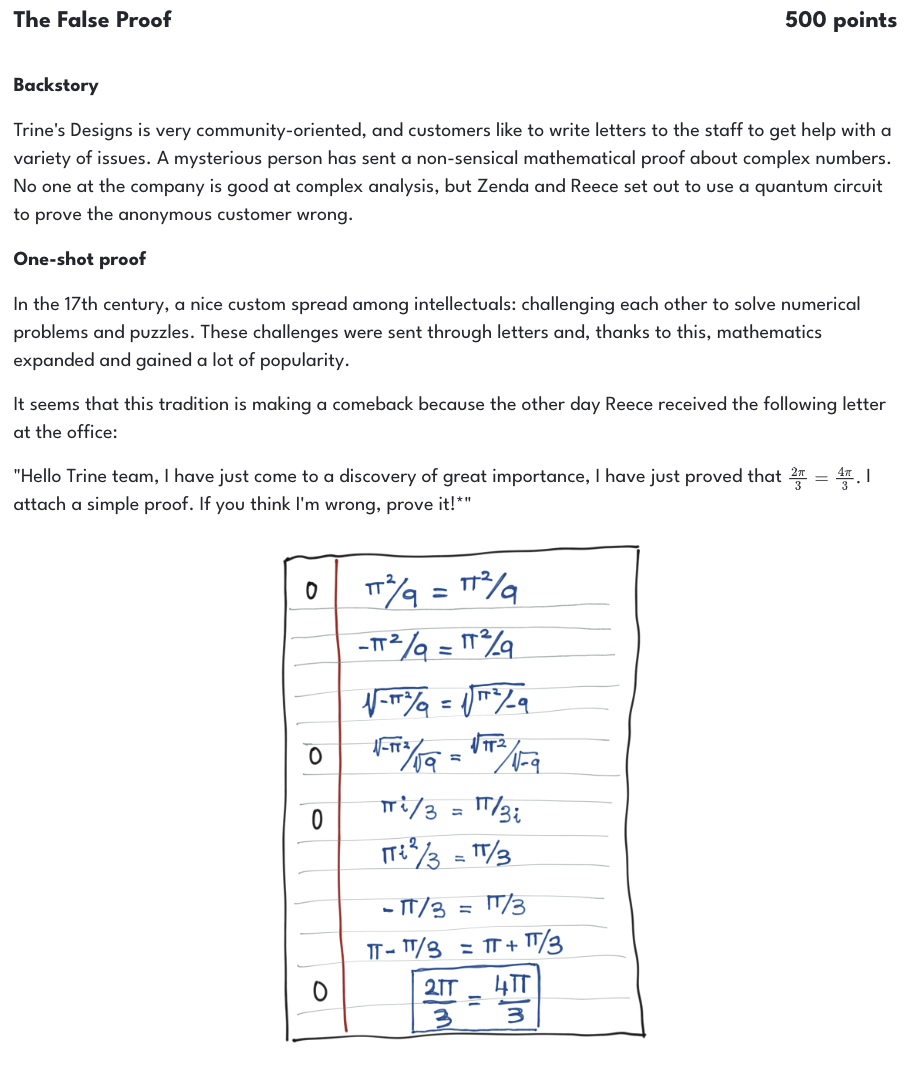

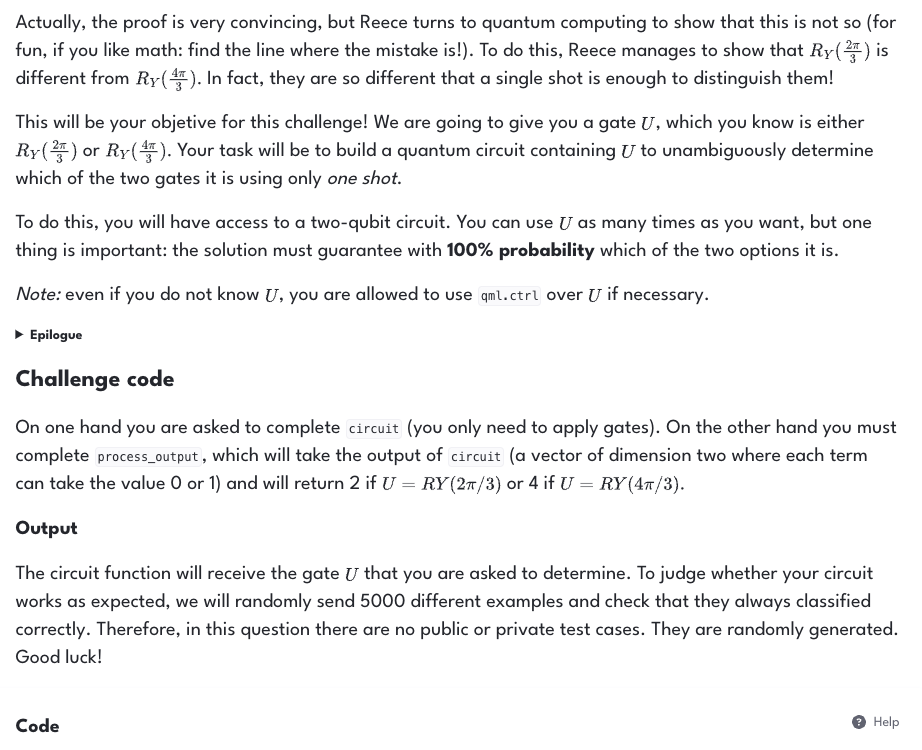

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

dev = qml.device("default.qubit", wires=2, shots=1)
dev.operations.add("op")
dev.operations.add("C(op)")


@qml.qnode(dev)
def circuit(U):
    """This will be the circuit you will use to determine which of the two angles we have.
    Remember that only a single shot will be executed.

    Args:
        U (qml.ops): It is the gate to discriminate between  RY(2pi/3) or RY(4pi/3).

    Returns:
        (numpy.tensor): Vector of two elements representing the output measured in each of the qubits.
    """
    # Put your code here #
    # to use U,  call 'U(wires = <wire where you want to apply the gate>)'
    # to use Control-U, call 'qml.ctrl(U, control = <control wire>)(wires = <wire where you want to apply the gate>)'
    return qml.sample(wires=range(2))

def process_output(measurement):
    """This function processes the output of the circuit to discriminate between gates.

    Args:
        measurement (numpy.array): Output of the previous circuit a vector of dimension 2.

    Returns:
        (int): return 2 or 4 depending on the associated RY gate.
    """
    # Put your code here #


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    return None

def check(solution_output: str, expected_output: str) -> None:
    numbers = 2 * np.random.randint(1, 3, 5000)

    def U2(wires):
        class op(qml.operation.Operator):
            num_wires = 1

            def compute_decomposition(self, wires):
                raise ValueError("You cannot decompose this gate")

            def matrix(self):
                return qml.matrix(qml.RY(2 * np.pi / 3, wires=3))

        op(wires=wires)
        return None

    def U4(wires):
        class op(qml.operation.Operator):
            num_wires = 1

            def compute_decomposition(self, wires):
                raise ValueError("You cannot decompose this gate")

            def matrix(self):
                return qml.matrix(qml.RY(4 * np.pi / 3, wires=3))

        op(wires=wires)
        return None

    output = []
    for i in numbers:
        if i == 2:
            U = U2
        else:
            U = U4
        out = circuit(U)
        output.append(process_output(out))

    assert np.allclose(
        output, numbers, rtol=1e-4
    ), "Your circuit does not give the correct output."


test_cases = [['No input', 'No output']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

# problem 6

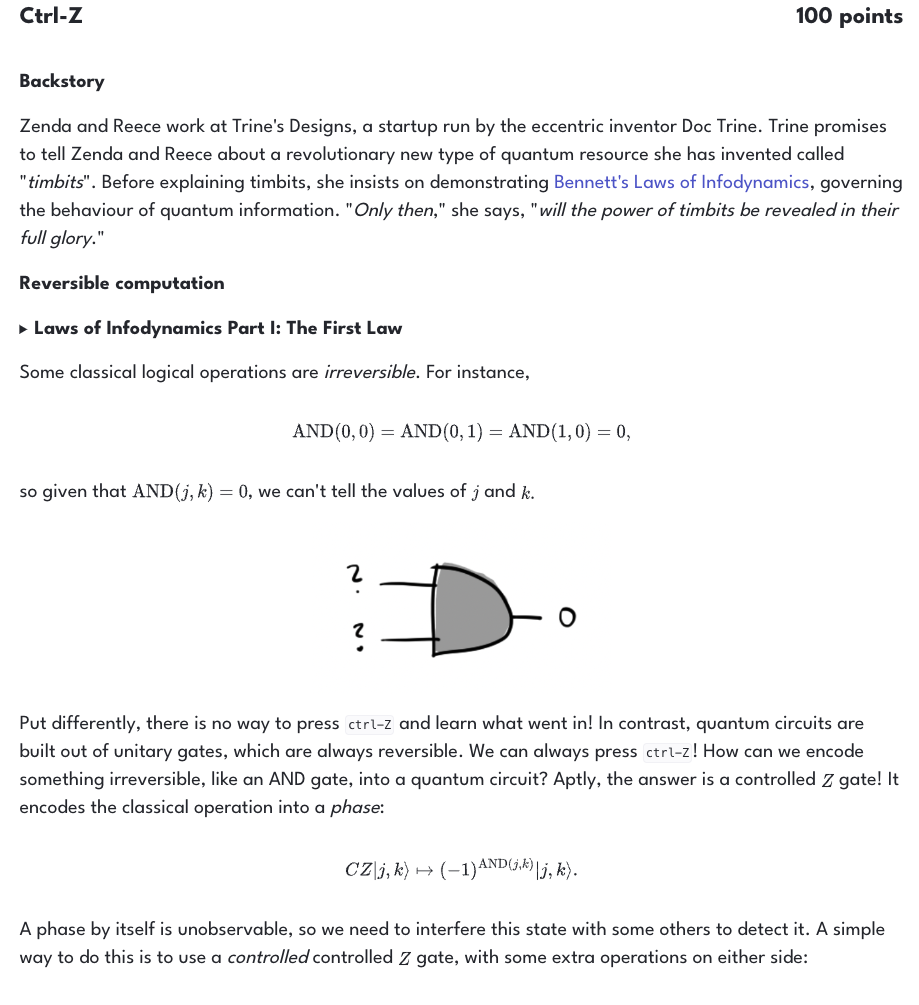

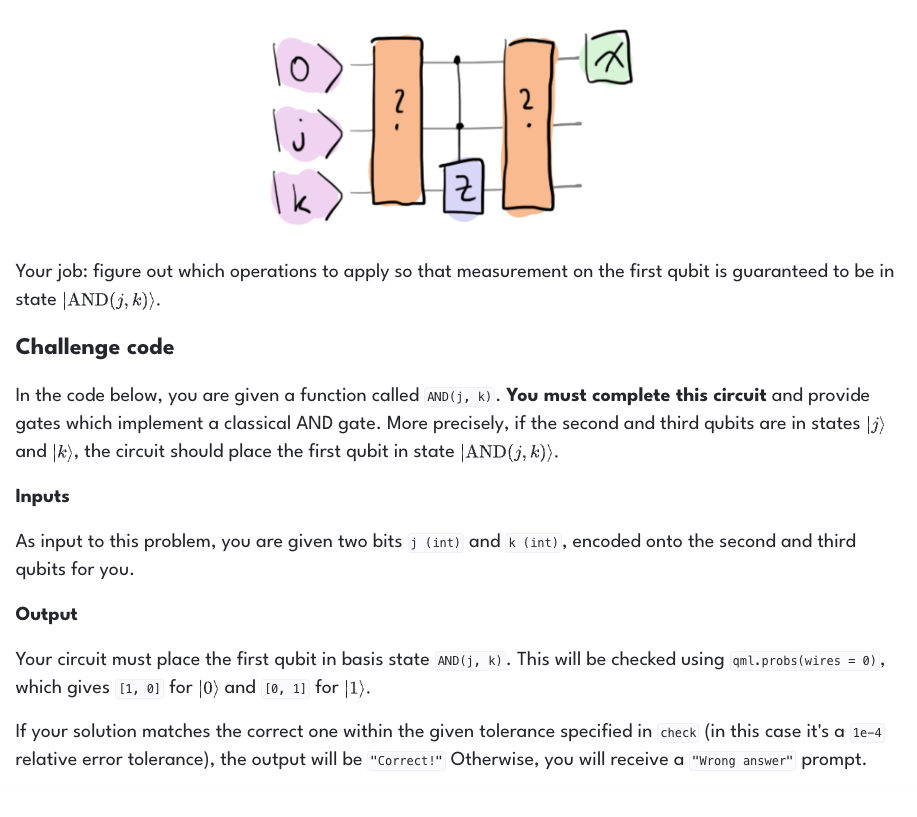

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def AND(j, k):
    """Implements the AND gate using quantum gates and computes j AND k.

    Args:
        j (int): A classical bit, either 0 or 1. 
        k (int): A classical bit, either 0 or 1. 

    Returns:
        float: The probabilities of measurement on wire 0.
    """

    if j == 1:
        qml.PauliX(wires=1)
    if k == 1:
        qml.PauliX(wires=2)


    # Put your code here #


    qml.ctrl(qml.PauliZ, control =[0, 1])(wires = [2])
        


    # Your code here #

    return qml.probs(wires=0)


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    j, k = json.loads(test_case_input)
    output = AND(j, k).tolist()

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(solution_output, expected_output, rtol=1e-4), "Your classical operation isn't behaving correctly!"


test_cases = [['[0, 0]', '[1, 0]'], ['[1, 1]', '[0, 1]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

# problem 7

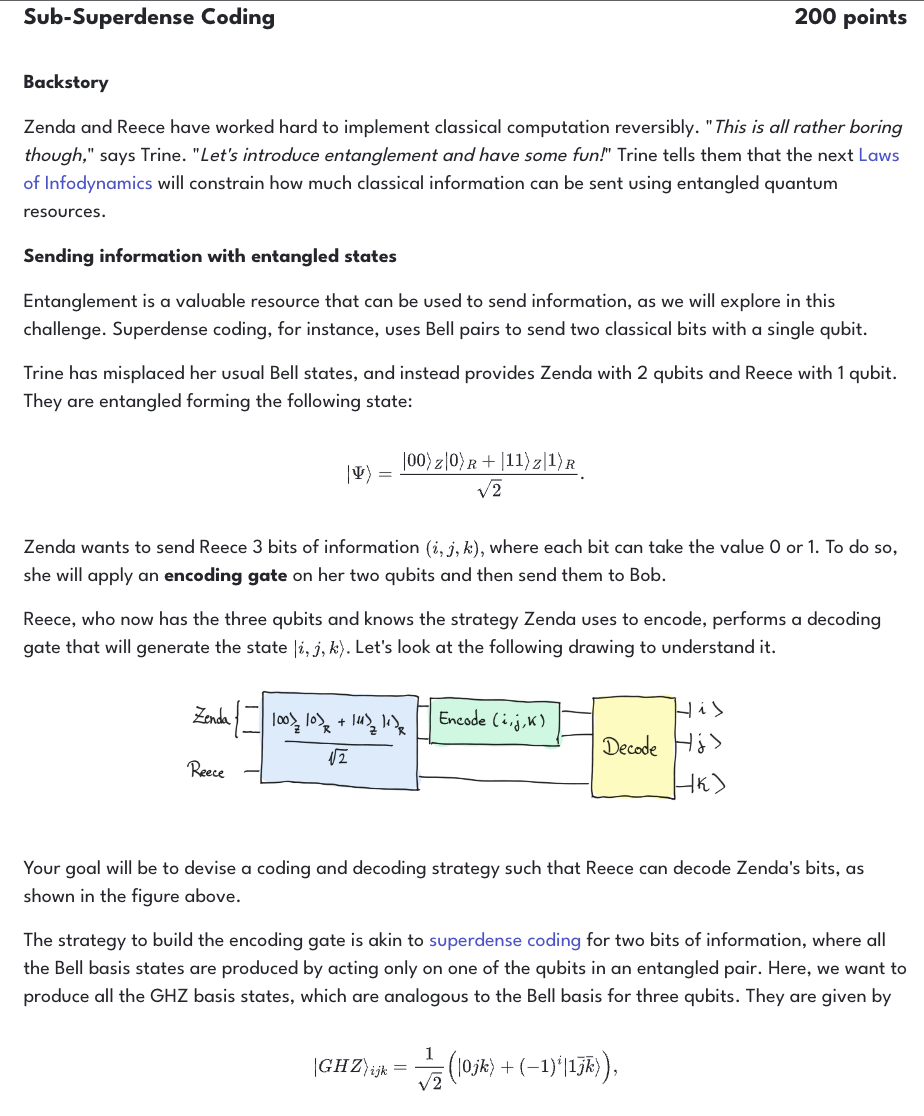

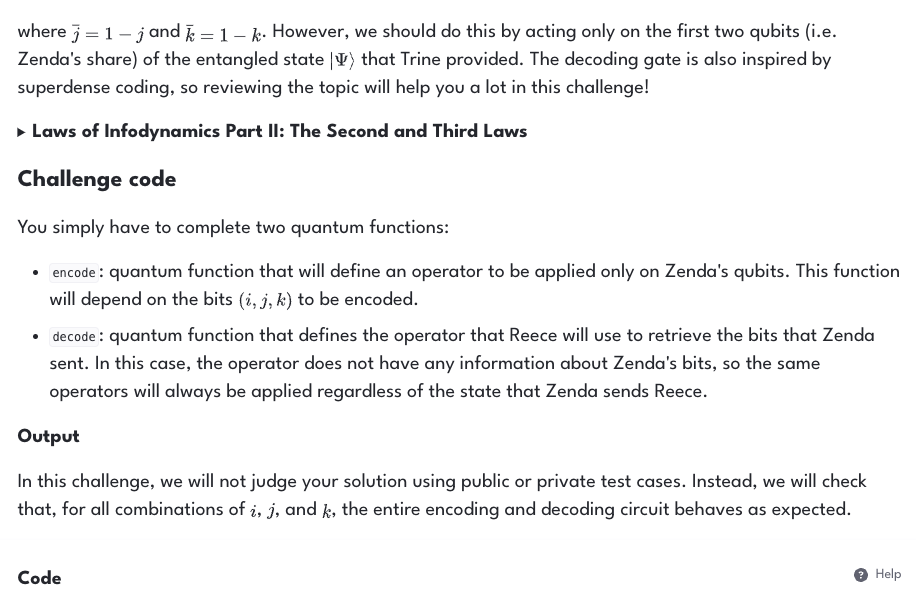

In [ ]:
import pennylane as qml
import pennylane.numpy as np

def encode(i, j, k):
    """
    Quantum encoding function. It must act only on the first two qubits.
    This function does not return anything, it simply applies gates.

    Args:
        i, j, k (int): The three encoding bits. They will take the values 1 or 0.

    """


    # Put your code here #


def decode():
    """
    Quantum decoding function. It can act on the three qubits.
    This function does not return anything, it simply applies gates.
    """


    # Put your code here #


dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def circuit(i, j, k):
    """
    Circuit that generates the complete communication protocol.

    Args:
        i, j, k (int): The three encoding bits. They will take the value 1 or 0.
    """

    # We prepare the state 1/sqrt(2)(|000> + |111>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])

    # Zenda encodes the bits
    encode(i, j, k)

    # Reece decode the information
    decode()

    return qml.probs(wires=range(3))


# These functions are responsible for testing the solution.



def run(test_case_input: str) -> str:

    return None

def check(solution_output: str, expected_output: str) -> None:

    for i in range(2):
        for j in range(2):
            for k in range(2):
                assert np.isclose(circuit(i, j , k)[4 * i + 2 * j + k],1)

                dev = qml.device("default.qubit", wires=3)

                @qml.qnode(dev)
                def circuit2(i, j, k):
                    encode(i, j, k)
                    return qml.probs(wires=range(3))

                circuit2(i, j, k)
                ops = circuit2.tape.operations

                for op in ops:
                    assert not (2 in op.wires), "Invalid connection between qubits."


test_cases = [['No input', 'No output']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

# problem 8

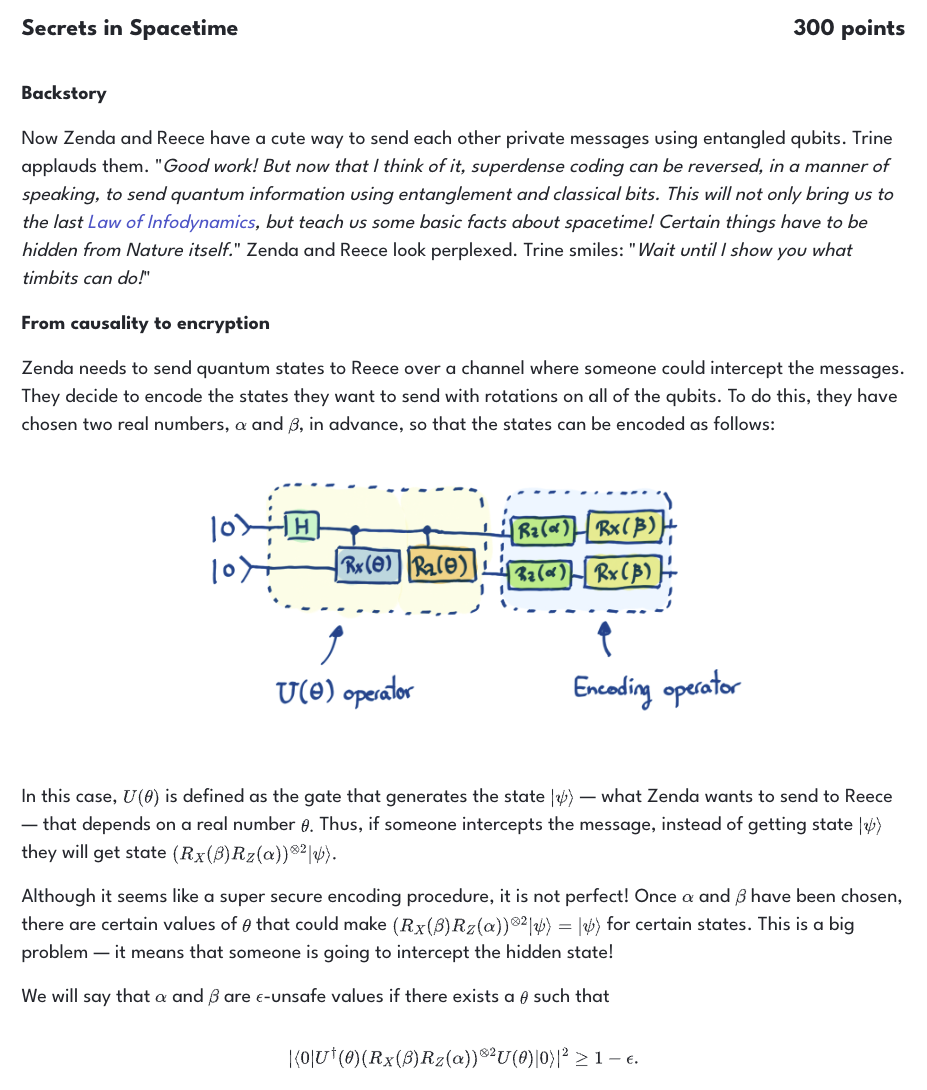

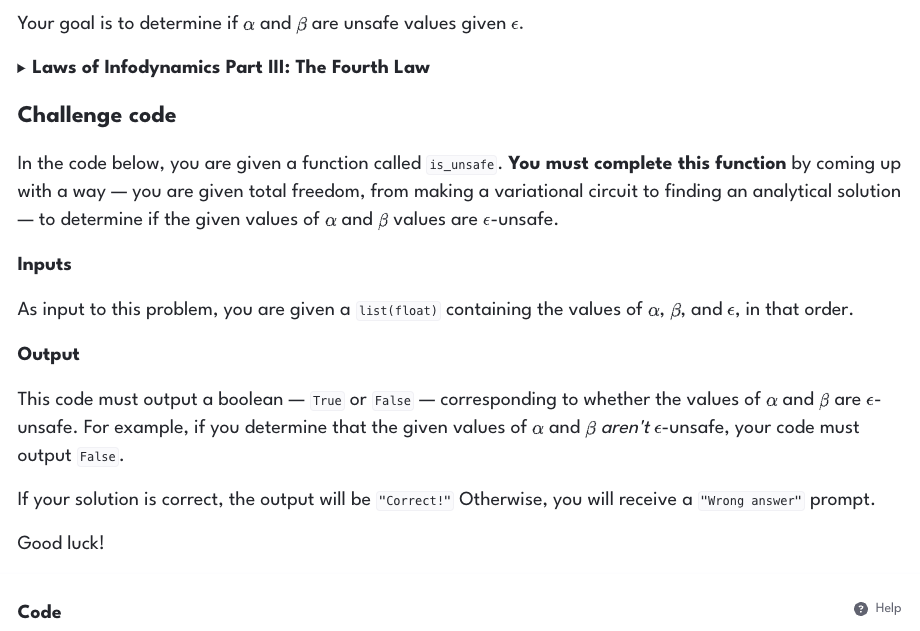

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

def U_psi(theta):
    """
    Quantum function that generates |psi>, Zenda's state wants to send to Reece.

    Args:
        theta (float): Parameter that generates the state.

    """
    qml.Hadamard(wires = 0)
    qml.CRX(theta, wires = [0,1])
    qml.CRZ(theta, wires = [0,1])

def is_unsafe(alpha, beta, epsilon):
    """
    Boolean function that we will use to know if a set of parameters is unsafe.

    Args:
        alpha (float): parameter used to encode the state.
        beta (float): parameter used to encode the state.
        epsilon (float): unsafe-tolerance.

    Returns:
        (bool): 'True' if alpha and beta are epsilon-unsafe coefficients. 'False' in the other case.

    """


    # Put your code here #


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    ins = json.loads(test_case_input)
    output = is_unsafe(*ins)
    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    
    def bool_to_int(string):
        if string == "True":
            return 1
        return 0

    solution_output = bool_to_int(solution_output)
    expected_output = bool_to_int(expected_output)
    assert solution_output == expected_output, "The solution is not correct."


test_cases = [['[0.1, 0.2, 0.3]', 'True'], ['[1.1, 1.2, 0.3]', 'False'], ['[1.1, 1.2, 0.4]', 'True'], ['[0.5, 1.9, 0.7]', 'True']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")